In [1]:
from src.functions import *

**Problema 3**: A constante de Stefan-Boltzman, $\sigma$, relaciona a energia total emitida por um corpo negro com a sua temperatura. Ela é dada por

$$
\sigma=\frac{\pi^2k_b^4}{60\hbar^3c^2}\zeta(4),
$$
onde $\zeta(s)$ é função zeta de Riemann. A função zeta de Riemann pode ser expressa na forma na forma integral:
$$
\zeta(s)=\frac{1}{\Gamma(s)}\int_0^{\infty}\frac{x^{s-1}e^{-x}}{1-e^{-x}}dx,
$$
onde $\Gamma(s)=(s-1)!$ é a função Gamma. Utilizando *importance sampling*, gere amostras aleatórias de $x$ de uma distribuição exponencial, $\omega(x)=e^{-x}$ para $x\ge0$, que corresponde ao termo $e^{-x}$ no integrando. Reescreva a integral como
$$
\zeta(s)=\frac{1}{\Gamma(s)}\mathbb{E}\left[\frac{x^{s-1}}{1-e^{-x}}dx\right].
$$
Compare seu resultado de Monte Carlo com o valor exato:
$$
\zeta(4)=\frac{\pi^4}{90}.
$$

**Problema 4:** Considere a integral de uma fução...

### **Item (a)**

In [2]:

def integral_I(N, d):
    """
    Aproximação de uma integral pelo método de Monte Carlo, calculando manualmente o módulo 
    (norma euclidiana) e mantendo um laço explícito sobre N.

    Args:
        N (int): Número de amostras aleatórias.
        d (int): Dimensão da integral.

    Returns:
        float: Valor aproximado da integral.
    """
    S = 0  # Inicializa a soma
    
    for i in range(N):  # Laço sobre as N amostras
        # Gera um vetor aleatório de tamanho d, com valores uniformes entre 0 e 1
        x_i = np.random.uniform(0, 1, d)
        
        # Calcula o módulo (norma euclidiana) do vetor x_i manualmente
        # Fórmula: ||x|| = sqrt(x_1^2 + x_2^2 + ... + x_d^2)
        modulus = np.sqrt(np.sum(x_i**2))
        
        # Soma a função objetivo avaliada no módulo
        S += np.exp(-modulus**2)

    # Retorna a média acumulada da soma para aproximar o valor da integral
    return S / N



In [4]:
#d é a dimensão

for d in 2,6,10:
    N = 100000  # Número de amostras
    I=(0.746824)**d
    resultado = integral_I(N, d)
    print(f"Valor aproximado da integral: {resultado} para d={d}")
    print(f"valor teórico: {I}")
    diferenca = abs((resultado - I) / I) * 100
    print(f"Diferença do valor real: {diferenca:0.3f}%")


Valor aproximado da integral: 0.5575033235581822 para d=2
valor teórico: 0.557746086976
Diferença do valor real: 0.044%
Valor aproximado da integral: 0.17390110285456054 para d=6
valor teórico: 0.17350404178504858
Diferença do valor real: 0.229%
Valor aproximado da integral: 0.05397512632642629 para d=10
valor teórico: 0.05397375834398862
Diferença do valor real: 0.003%


In [5]:
# Função para calcular erro padrão da média e a taxa de convergência
def convergence_rate(d, N_samples_list):
    """
    Calcula o erro padrão da média e taxa de convergência para diferentes números de amostras.
    
    Args:
        d (int): Dimensão da integral.
        N_samples_list (list of int): Lista com o número de amostras.
    
    Returns:
        tuple: Lista de erros padrão da média e taxas de convergência.
    """
    errors = []
    for N in N_samples_list:
        estimates = [integral_I(N, d) for _ in range(10)]  # Média em 10 execuções
        error_std = np.std(estimates)                                # Erro padrão
        errors.append(error_std)
    
    # Calcula a taxa de convergência: log-log slope
    log_N = np.log(N_samples_list)
    log_errors = np.log(errors)
    slope = np.polyfit(log_N, log_errors, 1)[0]  # Coeficiente angular da reta
    return errors, slope

# Parâmetros
dimensions = [2, 6, 10]
N_samples_list = [10**i for i in range(2,7)]  # Amostras variando de 10^2 a 10^5


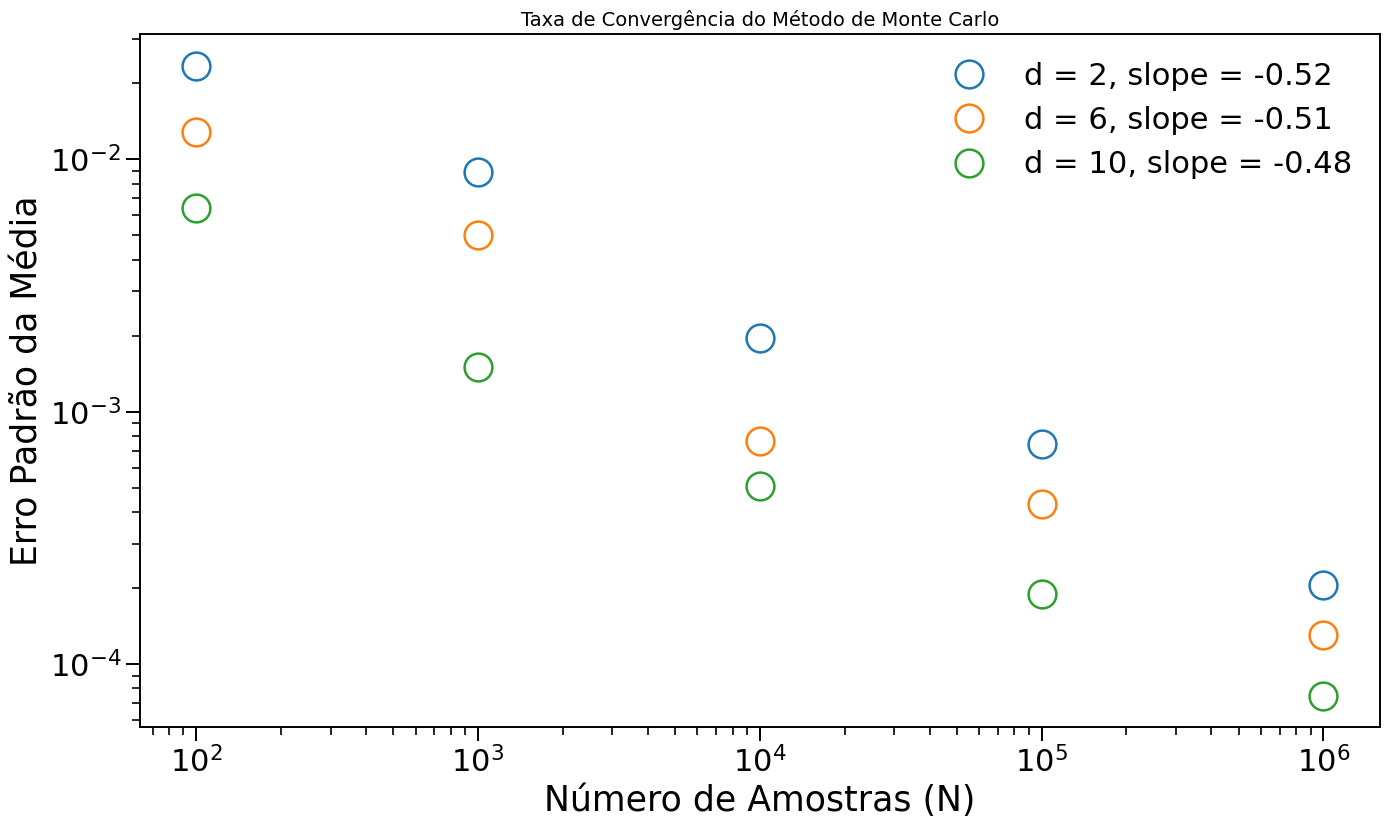

In [6]:
# Plotagem
plt.figure(figsize=(16, 9))
for d in dimensions:
    errors, slope = convergence_rate(d, N_samples_list)
    plt.plot(N_samples_list, errors, 'o', label=f'd = {d}, slope = {slope:.2f}', mfc="None", ms=20, mew=1.8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de Amostras (N)', size=25)
plt.ylabel('Erro Padrão da Média', size=25)

# Configurações dos ticks
plt.tick_params('both', which='major', width=1.4, length=10, labelsize=22)  # Major ticks
plt.tick_params('both', which='minor', width=1.2, length=6, labelsize=18)   # Minor ticks
plt.minorticks_on()  # Ativa os minor ticks

plt.title('Taxa de Convergência do Método de Monte Carlo', fontsize=14)
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.show()
